<a href="https://colab.research.google.com/github/omkanpariya/omkanpariya/blob/main/titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import joblib

In [ ]:
data=pd.read_csv("/content/titanic_data.csv")

In [ ]:
# Showing the first 5 records in the dataset
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Showing a brief info about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


In [ ]:
#Showing the null values in each column
data.isna().sum()


survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Get a describtion about data
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,713.000000,889.000000,889.000000,889.000000
mean,0.384702,2.307087,29.698696,0.523060,0.382452,32.259059
std,0.486799,0.836367,14.536691,1.103729,0.806761,49.735870
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


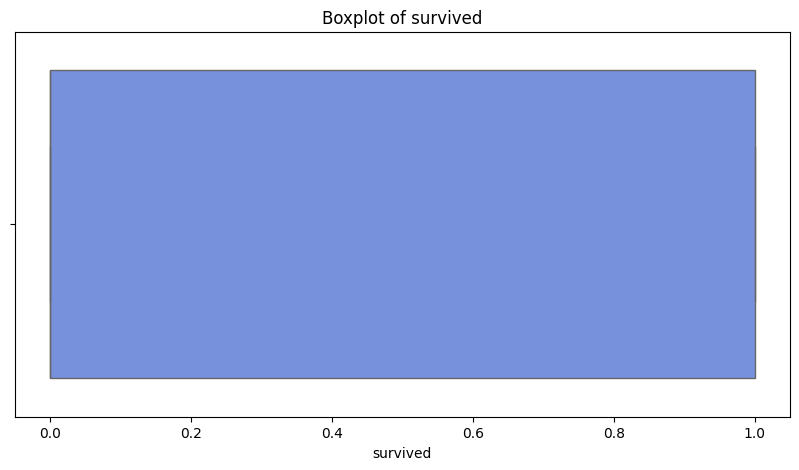

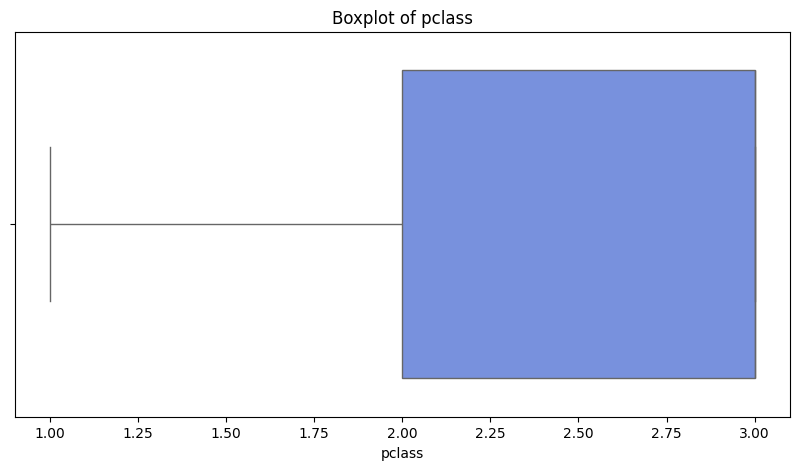

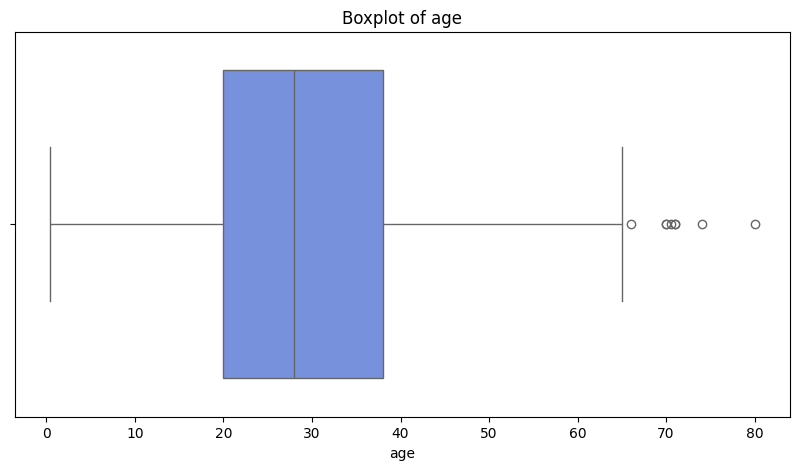

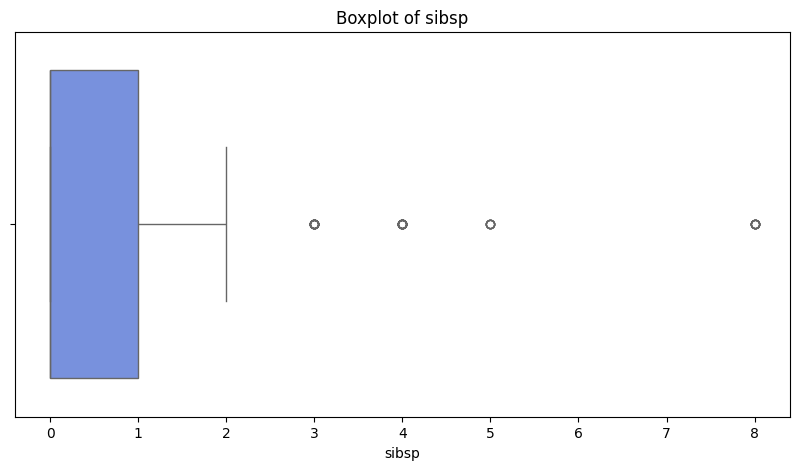

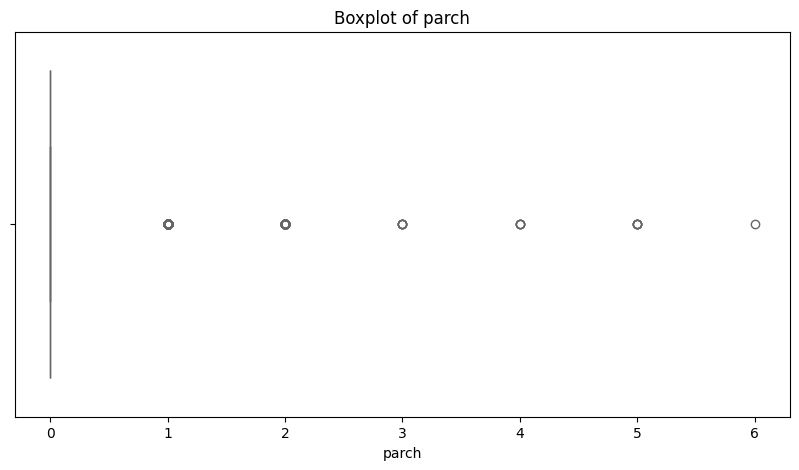

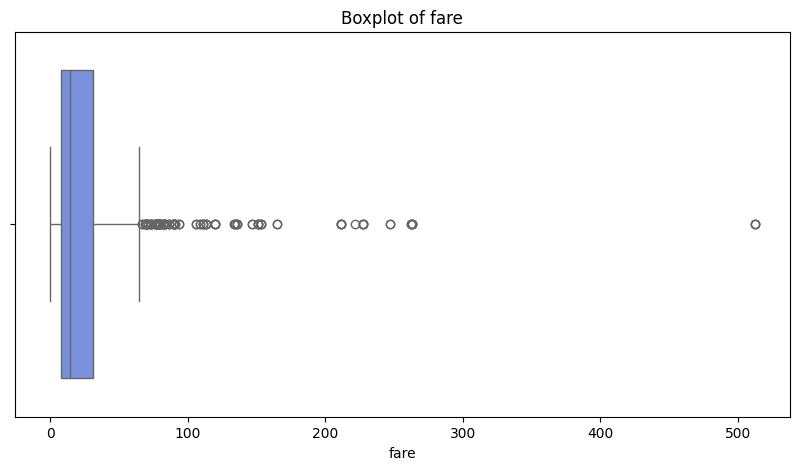

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
for col in data.select_dtypes(include=['int', 'float']).columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(f'Boxplot of {col}')
    bp = sns.boxplot(data=data, x=col, ax=ax)
    plt.show()
    plt.close(fig)

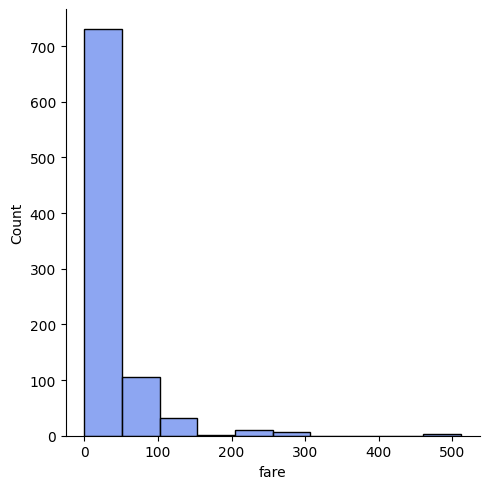

In [ ]:
sns.set_palette("coolwarm")
sns.displot(data=data, x="fare",bins=10)

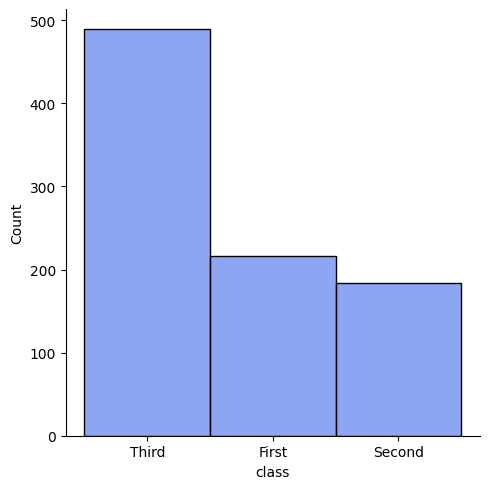

In [ ]:
sns.set_palette("coolwarm")
sns.displot(data=data, x="class")

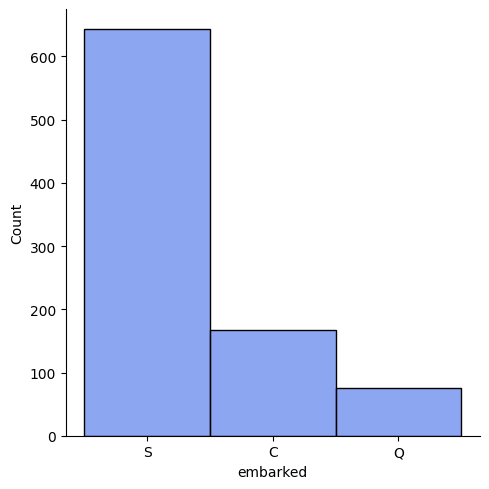

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
sns.displot(data=data, x="embarked")

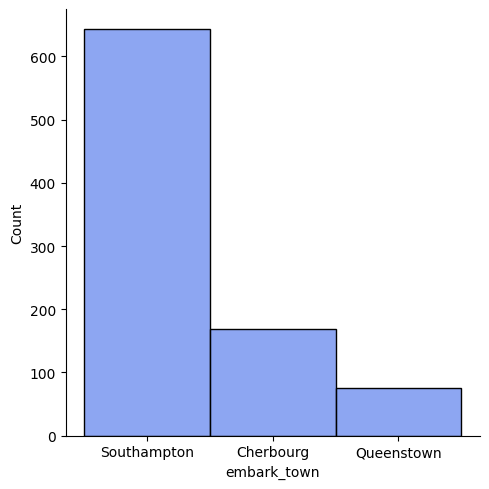

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
sns.displot(data=data, x="embark_town")

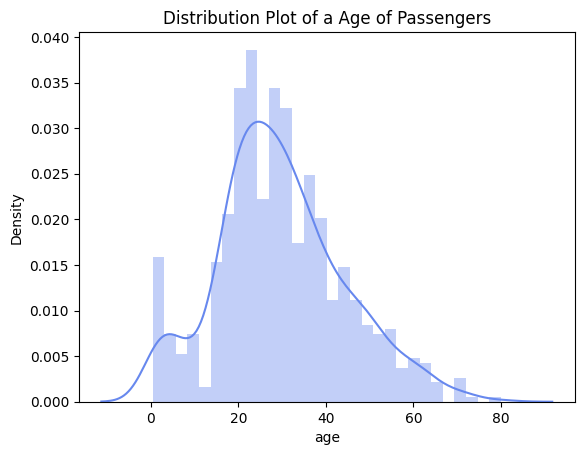

In [ ]:
sns.set_palette("coolwarm")
sns.distplot(data['age'], kde=True, bins=30)
plt.title('Distribution Plot of a Age of Passengers')
plt.show()

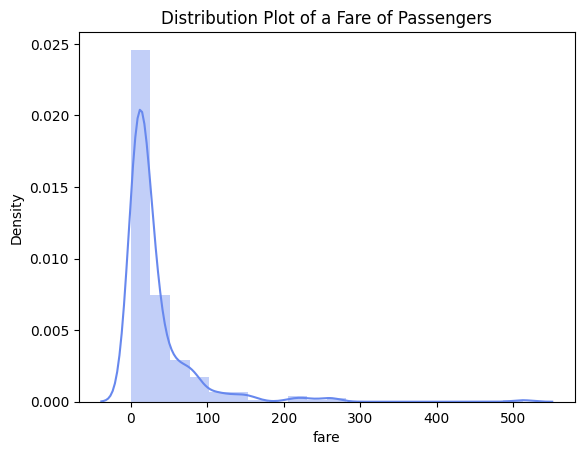

In [ ]:
sns.set_palette("coolwarm")
sns.distplot(data['fare'], kde=True, bins=20)
plt.title('Distribution Plot of a Fare of Passengers')
plt.show()

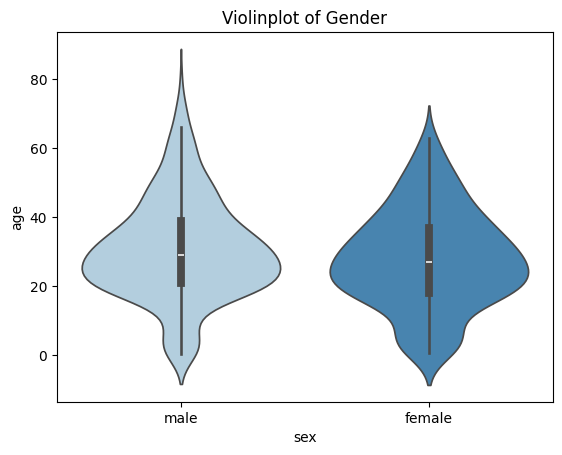

In [ ]:
custom_palette = "Blues"
sns.violinplot(x='sex', y='age', data=data, palette=custom_palette)
plt.title('Violinplot of Gender')
plt.show()

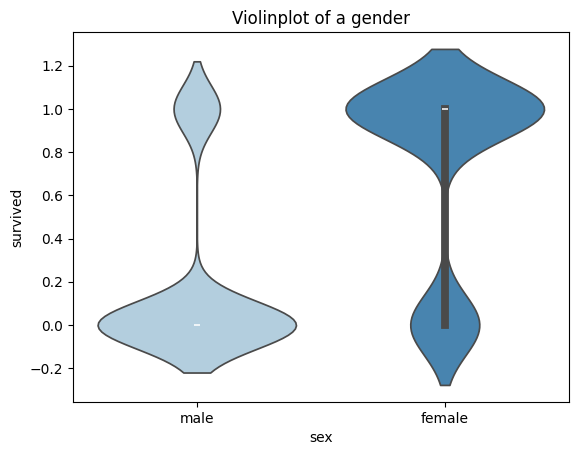

In [ ]:
custom_palette = "Blues"
sns.violinplot(x='sex', y='survived', data=data,palette=custom_palette)
plt.title('Violinplot of a gender')
plt.show()

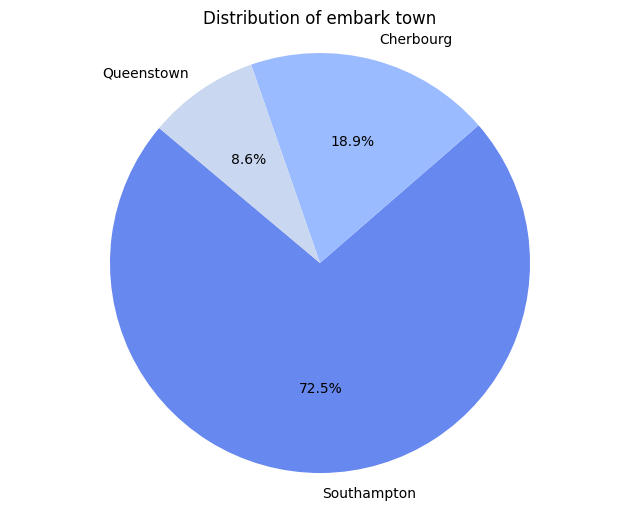

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['embark_town'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of embark town")
plt.ylabel("")
plt.axis('equal')
plt.show()

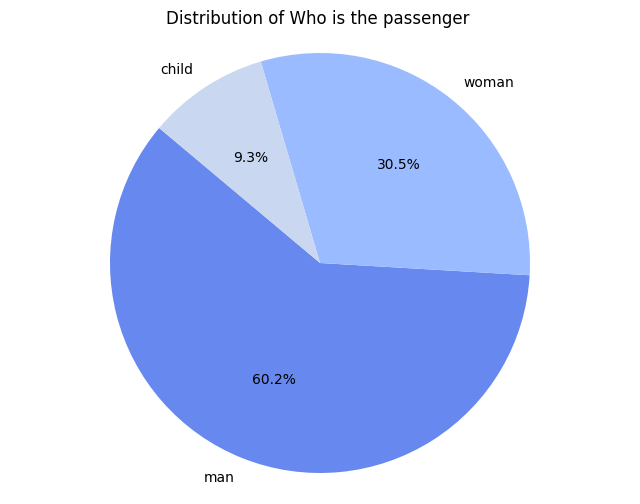

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['who'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of Who is the passenger ")
plt.ylabel("")
plt.axis('equal')
plt.show()

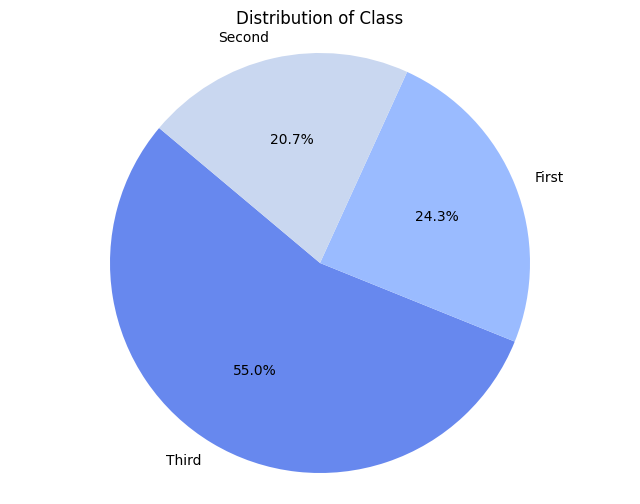

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of Class")
plt.ylabel("")
plt.axis('equal')
plt.show()


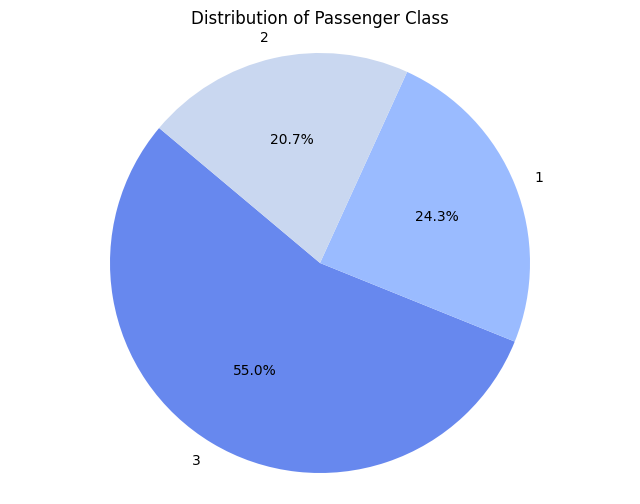

In [ ]:
custom_palette = "coolwarm"
sns.set_palette(custom_palette)
plt.figure(figsize=(8, 6))
data['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(), startangle=140)
plt.title("Distribution of Passenger Class")
plt.ylabel("")
plt.axis('equal')
plt.show()


In [ ]:
#pre-processing data
#handing missing data
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
886,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data["age"] = data["age"].fillna(np.mean(data["age"]))


In [ ]:
data["age"].isna().sum()

0

In [ ]:
data.dropna(subset=["embarked"], inplace=True)

data["embarked"].isna().sum()

0

In [ ]:
data.dropna(subset=["embark_town"], inplace=True)
data["embark_town"].isna().sum()


0

In [ ]:
data.isna().sum()


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           686
embark_town      0
alive            0
alone            0
dtype: int64

In [ ]:
#encoding categorical data

for col in data.columns:
    if data[col].dtype == "object":
        print(data[col].value_counts())
        print("\n")



sex
male      575
female    312
Name: count, dtype: int64


embarked
S    643
C    168
Q     76
Name: count, dtype: int64


class
Third     489
First     214
Second    184
Name: count, dtype: int64


who
man      535
woman    269
child     83
Name: count, dtype: int64


deck
C    59
B    45
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64


embark_town
Southampton    643
Cherbourg      168
Queenstown      76
Name: count, dtype: int64


alive
no     547
yes    340
Name: count, dtype: int64




In [ ]:
OHE_cols = ["sex","alone"]
LAB_cols = ["embark_town", "who", "embarked"]
ORD_cols = ["class"]

# Label Encoding
for col in LAB_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# One-Hot Encoding
for col in OHE_cols:
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_cols = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_cols, columns=[f"{col}_{i}" for i in range(encoded_cols.shape[1])])
    data = pd.concat([data, encoded_df], axis=1)
    data.drop(columns=[col], inplace=True)

In [ ]:
data.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,sex_0,alone_0,alone_1
0,0.0,3.0,22.0,1.0,0.0,7.2500,2.0,Third,1.0,True,NaN,2.0,no,1.0,0.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,First,2.0,False,C,0.0,yes,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,2.0,Third,2.0,False,NaN,2.0,yes,0.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,2.0,First,2.0,False,C,2.0,yes,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,2.0,Third,1.0,True,NaN,2.0,no,1.0,1.0,0.0


In [ ]:
#

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 827
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     887 non-null    float64
 1   pclass       887 non-null    float64
 2   age          887 non-null    float64
 3   sibsp        887 non-null    float64
 4   parch        887 non-null    float64
 5   fare         887 non-null    float64
 6   embarked     887 non-null    float64
 7   class        887 non-null    object 
 8   who          887 non-null    float64
 9   adult_male   887 non-null    object 
 10  deck         201 non-null    object 
 11  embark_town  887 non-null    float64
 12  alive        887 non-null    object 
 13  sex_0        887 non-null    float64
 14  alone_0      889 non-null    float64
 15  alone_1      889 non-null    float64
dtypes: float64(12), object(4)
memory usage: 118.1+ KB


In [ ]:
data.isna().sum()

survived         2
pclass           2
age              2
sibsp            2
parch            2
fare             2
embarked         2
class            2
who              2
adult_male       2
deck           688
embark_town      2
alive            2
sex_0            2
alone_0          0
alone_1          0
dtype: int64

In [ ]:
#

In [ ]:
data.isna().sum()

survived         0
pclass           0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           686
embark_town      0
alive            0
sex_0            2
alone_0          0
alone_1          0
dtype: int64

In [ ]:
data=data.drop_duplicates()

In [ ]:
#scaling data

In [ ]:
Features=data.drop(columns="survived")
Goal=data["survived"]

In [ ]:
Features

,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,sex_0,alone_0,alone_1
0,3.0,22.000000,1.0,0.0,7.2500,2.0,Third,1.0,True,NaN,2.0,no,1.0,0.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,First,2.0,False,C,0.0,yes,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,Third,2.0,False,NaN,2.0,yes,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,First,2.0,False,C,2.0,yes,0.0,0.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,Third,1.0,True,NaN,2.0,no,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.0,27.000000,0.0,0.0,13.0000,2.0,Second,1.0,True,NaN,2.0,no,0.0,0.0,0.0
885,1.0,19.000000,0.0,0.0,30.0000,2.0,First,2.0,False,B,2.0,yes,1.0,1.0,0.0
886,3.0,29.698696,1.0,2.0,23.4500,2.0,Third,2.0,False,NaN,2.0,no,1.0,1.0,0.0
887,1.0,26.000000,0.0,0.0,30.0000,0.0,First,1.0,True,C,0.0,yes,NaN,0.0,1.0


In [ ]:
Features=pd.DataFrame(Features)

In [ ]:
Features

,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,sex_0,alone_0,alone_1
0,3.0,22.000000,1.0,0.0,7.2500,2.0,Third,1.0,True,NaN,2.0,no,1.0,0.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,0.0,First,2.0,False,C,0.0,yes,0.0,0.0,0.0
2,3.0,26.000000,0.0,0.0,7.9250,2.0,Third,2.0,False,NaN,2.0,yes,0.0,1.0,0.0
3,1.0,35.000000,1.0,0.0,53.1000,2.0,First,2.0,False,C,2.0,yes,0.0,0.0,0.0
4,3.0,35.000000,0.0,0.0,8.0500,2.0,Third,1.0,True,NaN,2.0,no,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2.0,27.000000,0.0,0.0,13.0000,2.0,Second,1.0,True,NaN,2.0,no,0.0,0.0,0.0
885,1.0,19.000000,0.0,0.0,30.0000,2.0,First,2.0,False,B,2.0,yes,1.0,1.0,0.0
886,3.0,29.698696,1.0,2.0,23.4500,2.0,Third,2.0,False,NaN,2.0,no,1.0,1.0,0.0
887,1.0,26.000000,0.0,0.0,30.0000,0.0,First,1.0,True,C,0.0,yes,NaN,0.0,1.0


In [ ]:


Goal


0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
884    0.0
885    1.0
886    0.0
887    1.0
888    0.0
Name: survived, Length: 826, dtype: float64

In [ ]:
#

In [ ]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       826 non-null    float64
 1   age          826 non-null    float64
 2   sibsp        826 non-null    float64
 3   parch        826 non-null    float64
 4   fare         826 non-null    float64
 5   embarked     826 non-null    float64
 6   class        826 non-null    object 
 7   who          826 non-null    float64
 8   adult_male   826 non-null    object 
 9   deck         201 non-null    object 
 10  embark_town  826 non-null    float64
 11  alive        826 non-null    object 
 12  sex_0        824 non-null    float64
 13  alone_0      826 non-null    float64
 14  alone_1      826 non-null    float64
dtypes: float64(11), object(4)
memory usage: 103.2+ KB


In [ ]:
#Splitting Train And Test Groups

Ftrain,Ftest,Gtrain,Gtest=train_test_split(Features,Goal,test_size=0.1,random_state=5)

In [ ]:
#Applying GridSearch Model on Logistic Regression Classifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Example data loading (replace this with your actual data loading code)
data = load_iris()
Ftrain, Ftest, Gtrain, Gtest = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Define the parameter grid
LR_params = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "dual": [True, False],
    "tol": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "max_iter": [10000]  # Ensuring max_iter is large enough for convergence
}

# Initialize Logistic Regression
LR = LogisticRegression()

# Initialize GridSearchCV
GRS = GridSearchCV(LR, LR_params, cv=5, n_jobs=-1)

# Fit the model
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)



{'dual': False, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}
0.975


In [ ]:
LR=LogisticRegression(dual=False,penalty="l2",solver="saga",tol=10)
LR.fit(Ftrain,Gtrain)
LR_Pred=LR.predict(Ftest)
LR_Pred_Train=LR.predict(Ftrain)

In [ ]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,LR_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,LR_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      1.00      0.78         9
           2       1.00      0.55      0.71        11

    accuracy                           0.83        30
   macro avg       0.88      0.85      0.83        30
weighted avg       0.89      0.83      0.83        30
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.64      1.00      0.78        41
           2       1.00      0.41      0.58        39

    accuracy                           0.81       120
   macro avg       0.88      0.80      0.79       120
weighted avg       0.88      0.81      0.79       120
 




In [ ]:
test_accuracy = accuracy_score(Gtest, LR_Pred)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, LR_Pred_Train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 0.8333

Accuracy Score for the train group: 0.8083



[[10  0  0]
 [ 0  9  0]
 [ 0  5  6]]


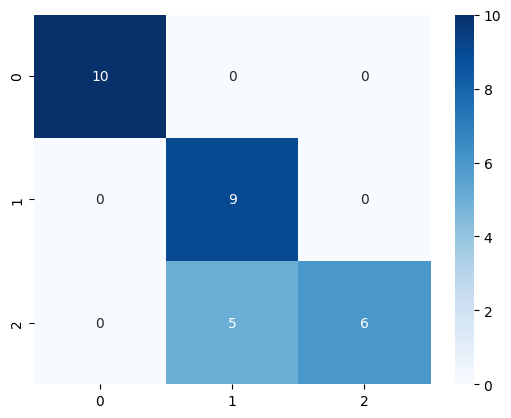

In [ ]:
CM_LR=confusion_matrix(Gtest,LR_Pred)
print(CM_LR)
sns.heatmap(CM_LR,annot=True,cmap="Blues")
plt.show()

In [ ]:
#Applying GridSearch Model on SVM Classifier

SVM_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


SVM = svm.SVC()
GRS = GridSearchCV(SVM, SVM_params, cv=5)
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.9583333333333334


In [ ]:
SVM=svm.SVC(C=1,degree=2,gamma="scale",kernel="rbf")
SVM.fit(Ftrain,Gtrain)
SVM_Pred=SVM.predict(Ftest)
SVM_Pred_Train=SVM.predict(Ftrain)

In [ ]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,SVM_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,SVM_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120
 




In [ ]:
test_accuracy = accuracy_score(Gtest, SVM_Pred)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, SVM_Pred_Train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 1.0000

Accuracy Score for the train group: 0.9750



[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


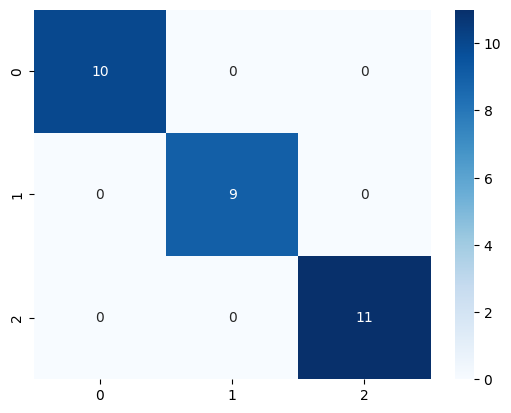

In [ ]:
CM_SVM=confusion_matrix(Gtest,SVM_Pred)
print(CM_SVM)
sns.heatmap(CM_SVM,annot=True,cmap="Blues")
plt.show()

In [ ]:
!pip install catboost



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.1 MB/s eta 0:00:00


In [ ]:
#Applying GridSearch Model on CatBoost Model

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Example data loading (replace this with your actual data loading code)
data = load_iris()
Ftrain, Ftest, Gtrain, Gtest = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Define the parameter grid for CatBoost
CB_params = {
    'learning_rate': [0.05, 0.1],
    'depth': [3, 5, 7],
    'iterations': [100, 200, 250],
    'bagging_temperature': [0.5, 1.0]
}

# Initialize CatBoostClassifier
CB = CatBoostClassifier(verbose=0)  # verbose=0 to suppress output during fitting

# Initialize GridSearchCV
GRS = GridSearchCV(CB, CB_params, cv=5, n_jobs=-1)

# Fit the model
GRS.fit(Ftrain, Gtrain)

# Print the best parameters and best score
print(GRS.best_params_)
print(GRS.best_score_)


{'bagging_temperature': 0.5, 'depth': 3, 'iterations': 100, 'learning_rate': 0.05}
0.95


In [ ]:
CB=CatBoostClassifier(bagging_temperature=0.5,depth=5 ,iterations=300,learning_rate=0.05)
CB.fit(Ftrain,Gtrain)
CB_Pred=CB.predict(Ftest)
CB_Pred_Train=CB.predict(Ftrain)

0:	learn: 1.0343969	total: 854us	remaining: 255ms
1:	learn: 0.9778726	total: 1.84ms	remaining: 274ms
2:	learn: 0.9310656	total: 2.28ms	remaining: 226ms
3:	learn: 0.8857888	total: 2.76ms	remaining: 204ms
4:	learn: 0.8411565	total: 3.26ms	remaining: 193ms
5:	learn: 0.8024962	total: 3.74ms	remaining: 183ms
6:	learn: 0.7641301	total: 4.16ms	remaining: 174ms
7:	learn: 0.7351363	total: 4.65ms	remaining: 170ms
8:	learn: 0.7065271	total: 5.33ms	remaining: 172ms
9:	learn: 0.6754341	total: 5.95ms	remaining: 173ms
10:	learn: 0.6475512	total: 6.43ms	remaining: 169ms
11:	learn: 0.6259959	total: 7.17ms	remaining: 172ms
12:	learn: 0.6033885	total: 7.77ms	remaining: 172ms
13:	learn: 0.5822455	total: 8.38ms	remaining: 171ms
14:	learn: 0.5643201	total: 8.95ms	remaining: 170ms
15:	learn: 0.5456649	total: 9.53ms	remaining: 169ms
16:	learn: 0.5290564	total: 10.1ms	remaining: 167ms
17:	learn: 0.5096530	total: 10.6ms	remaining: 166ms
18:	learn: 0.4905889	total: 11.1ms	remaining: 164ms
19:	learn: 0.4735823	to

In [ ]:
print("Classification Report for the test group : \n")
print(classification_report(Gtest,CB_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(Gtrain,CB_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120
 




In [ ]:
test_accuracy = accuracy_score(Gtest, CB_Pred)
print(f"Accuracy Score for the test group: {test_accuracy:.4f}\n")
train_accuracy = accuracy_score(Gtrain, CB_Pred_Train)
print(f"Accuracy Score for the train group: {train_accuracy:.4f}\n")

Accuracy Score for the test group: 1.0000

Accuracy Score for the train group: 1.0000



[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


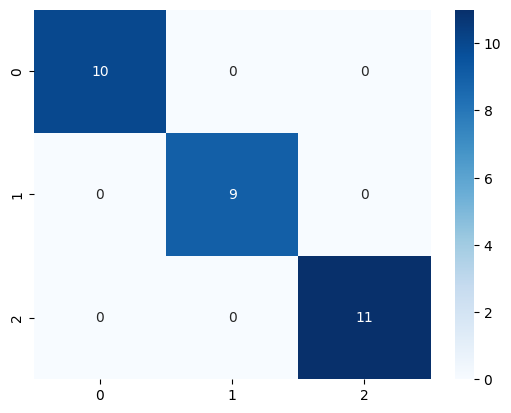

In [ ]:
CM_CB=confusion_matrix(Gtest,CB_Pred)
print(CM_CB)
sns.heatmap(CM_CB,annot=True,cmap="Blues")
plt.show()

In [ ]:
"""
The classification report for the test group shows precision of 0.78, recall of 0.84, and F1-score of 0.81 for class 0,
and precision of 0.79, recall of 0.71, and F1-score of 0.75 for class 1. The accuracy for the test group is 0.7831.
For the train group, precision for class 0 is 0.90, recall is 0.97, and F1-score is 0.93, while for class 1, precision
is 0.95, recall is 0.83, and F1-score is 0.88. The accuracy for the train group is 0.9150. The confusion matrix indicates 38
true negatives, 7 false positives, 11 false negatives, and 27 true positives.
The CatBoosting Model comes with the highest accuracy in training stage with 91 % , then SVM Model comes with 83 % and the
LogisticRegression classifier comes the last with 73% . The CatBoosting and SVM are sharing The #1 place in test accuracy 78.3% ,
So the final review for me the CatBoosting Classifier is the best one for this task because it comes with :
1] Highest Trainig Accuracy
2] Highest Test Accuracy
3] The least False predictions (from the confusion matrix)
4] Avoiding Overfitting
"""

'\nThe classification report for the test group shows precision of 0.78, recall of 0.84, and F1-score of 0.81 for class 0,\nand precision of 0.79, recall of 0.71, and F1-score of 0.75 for class 1. The accuracy for the test group is 0.7831.\nFor the train group, precision for class 0 is 0.90, recall is 0.97, and F1-score is 0.93, while for class 1, precision \nis 0.95, recall is 0.83, and F1-score is 0.88. The accuracy for the train group is 0.9150. The confusion matrix indicates 38 \ntrue negatives, 7 false positives, 11 false negatives, and 27 true positives.\nThe CatBoosting Model comes with the highest accuracy in training stage with 91 % , then SVM Model comes with 83 % and the \nLogisticRegression classifier comes the last with 73% . The CatBoosting and SVM are sharing The #1 place in test accuracy 78.3% ,\nSo the final review for me the CatBoosting Classifier is the best one for this task because it comes with :\n1] Highest Trainig Accuracy \n2] Highest Test Accuracy \n3] The lea

In [ ]:
joblib.dump(CB,"CatBoostingModel (Titanic Classification )- GDSC #3 Task.sav")

['CatBoostingModel (Titanic Classification )- GDSC #3 Task.sav']